In [10]:
import scipy.cluster.hierarchy as sch
import pandas as pd
from scgenome import cncluster, jointcnmodels
from scgenome import cnplot, utils, simulation
from scgenome.utils import cn_mat_to_cn_data, cn_mat_as_df
import numpy as np
import matplotlib.pyplot as plt
from scgenome.tests.constants_test import *

   i  j  r_merge naive_dist log_like i_count j_count       pi        d  \
0  0  1 -60.1481    2.44949 -47.3291       1       1  -2.3979  4.70048   
1  2  3 -84.5698    4.89898 -113.276       1       1  -2.3979  4.70048   
2  4  5 -551.014    2.44949  -566.39       2       2 -5.31156  9.40591   

  result_ind   d_left  d_right  ll_left ll_right pi_left pi_right  tree_ll  \
0          4  2.30259  2.30259  6.62573  3.89065       0        0  10.4211   
1          5  2.30259  2.30259  5.02994 -36.0388       0        0 -31.1041   
2          6  4.70048  4.70048 -47.3291 -113.276 -2.3979  -2.3979  -20.688   

  tree_ll_left tree_ll_right merge_count  
0      6.62573       3.89065           2  
1      5.02994      -36.0388           2  
2      10.4211      -31.1041           4  
sample_inds : [0, 1, 2, 3], left_child : <scgenome.TNode.TNode object at 0x119a6e410> right_child : <scgenome.TNode.TNode object at 0x119a6e410> pi : -5.311562593298058, d : 9.40590715552016, ll : -566.3899659970759, l

ZeroDivisionError: float division by zero

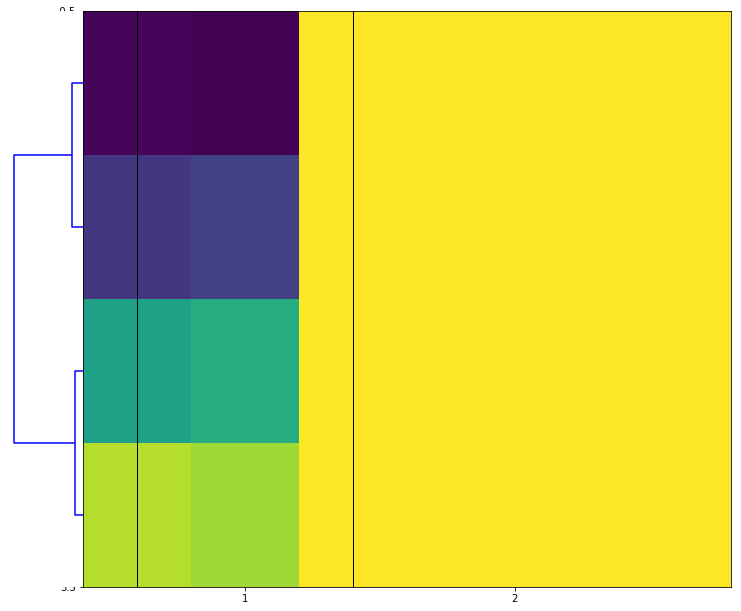

In [16]:
df_cn_mat = cn_mat_as_df(E2_CN_MAT, E2_CHR_NAMES)
cn_data = cn_mat_to_cn_data(df_cn_mat, cell_id_vals=E2_CELL_IDS)
cn_data["cluster_id"] = (
    cn_data["cell_id"].str.split("_", expand=True).iloc[:, 0])
np.random.seed(2)
cn_data["copy2"] = cn_data["copy"] + abs(np.random.normal(scale=0.3, size=cn_data.shape[0]))
cn_data.columns = ["chr", "bin", "cell_id", "state", "start", "end",
                   "cluster_id", "copy"]
cn_data["reads"] = 1

alpha=10
linkage, root, cl_cell_ids, matrix_data, measurement, variances = (
    cncluster.bayesian_cluster(cn_data, n_states=11, debug=True,
                               value_ids=["copy", "state"],
                               alpha=alpha)
)

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None):
    print(linkage)
print(root)
print(cl_cell_ids)
print("expected----------")
prob_same = 0.8
transmodel = {"kind": "twoparam", "e0": prob_same,
              "e1": 1 - prob_same}
ll = [
    jointcnmodels.calculate_marginal_ll_simple(
        E2_CN_MAT[[i], :],
        variances[[i], :],
        transmodel
    )

    for i in range(E1_CN_MAT.shape[0])
]
np.testing.assert_almost_equal(variances, E2_VAR)
print(f"ll {ll}")
print(f"variances\n{variances}")
print(f"cn_data:\n{cn_data}")
print("*********************************-")
ll_01 = jointcnmodels.calculate_marginal_ll_simple(E2_CN_MAT[[0,1], :], variances[[0,1], :], transmodel)
pi_01 = 1 / (1+alpha**2)
tll_01 = 1
print(f"ll_01: {jointcnmodels.calculate_marginal_ll_simple(E2_CN_MAT[[0,1], :], variances[[0,1], :], transmodel)}")
print(f"ll_01: {jointcnmodels.calculate_marginal_ll_simple(E2_CN_MAT[[0,1], :], variances[[0,1], :], transmodel)}")

cn_data["bhc_cluster_id"] = 1
cn_data["origin_id_int"] = 1
plinkage, plot_data = simulation.get_plot_data(linkage)
fig = plt.figure(figsize=(10, 8))
matrix_data = cnplot.plot_clustered_cell_cn_matrix_figure(
    fig, cn_data, "copy", cluster_field_name="bhc_cluster_id",
    linkage=plot_data, origin_field_name="origin_id_int", max_cn=8, flip=False, raw=True)

In [15]:
cn_data

,chr,bin,cell_id,state,start,end,cluster_id,copy,reads,bhc_cluster_id,origin_id_int
0,1,0,c1,1,0,9,c1,1.125027,1,1,1
1,1,1,c1,1,10,19,c1,1.016880,1,1,1
2,1,2,c1,9,20,29,c1,9.640859,1,1,1
3,2,3,c1,9,30,39,c1,9.492081,1,1,1
4,2,4,c1,9,40,49,c1,9.538031,1,1,1
5,2,5,c1,9,50,59,c1,9.252524,1,1,1
6,1,0,c2,2,0,9,c2,2.150864,1,1,1
7,1,1,c2,2,10,19,c2,2.373586,1,1,1
8,1,2,c2,10,20,29,c2,10.317386,1,1,1
9,2,3,c2,10,30,39,c2,10.272702,1,1,1
